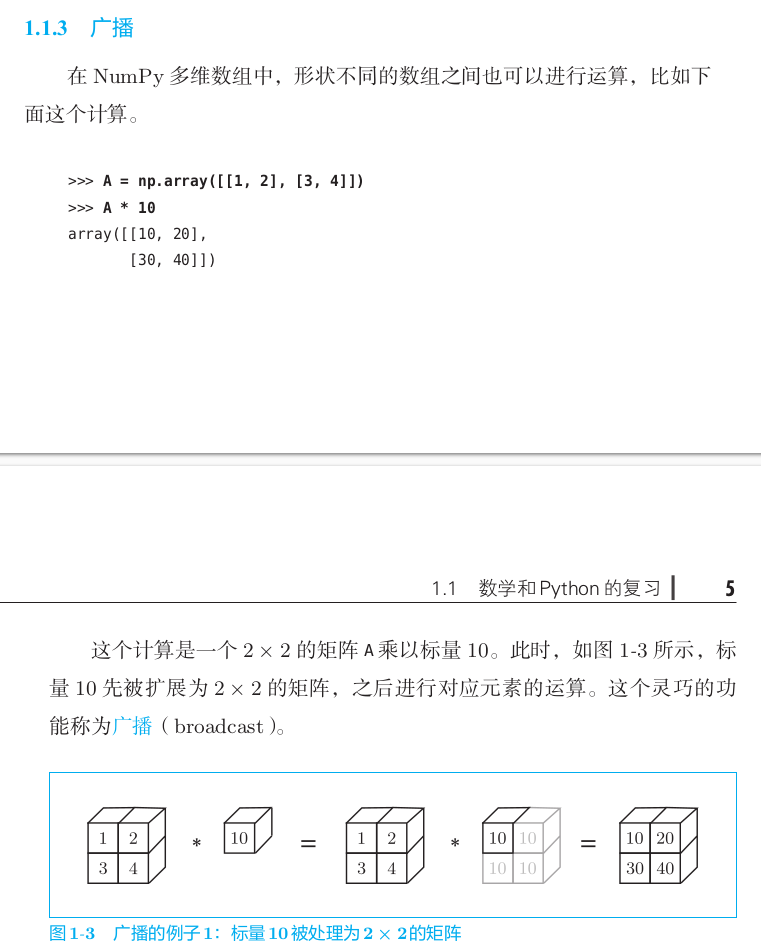

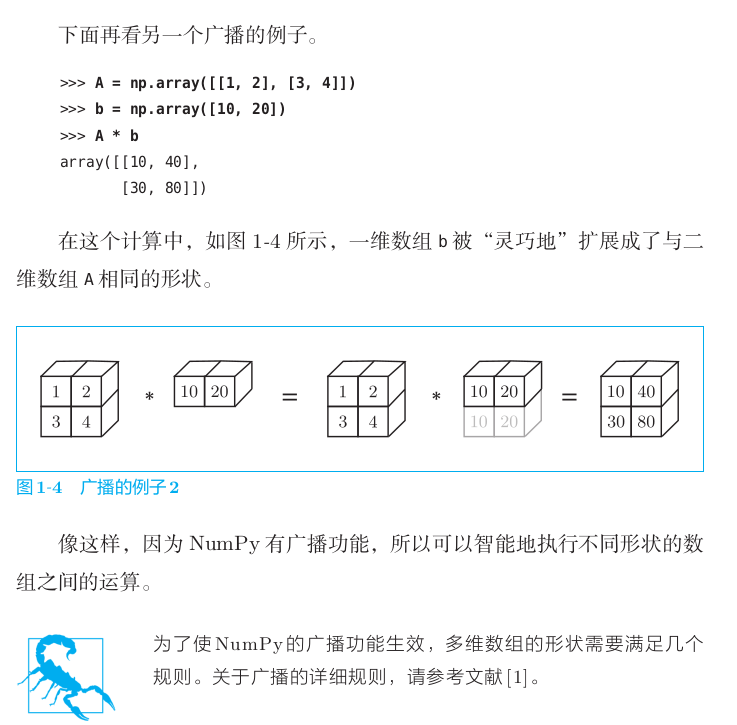

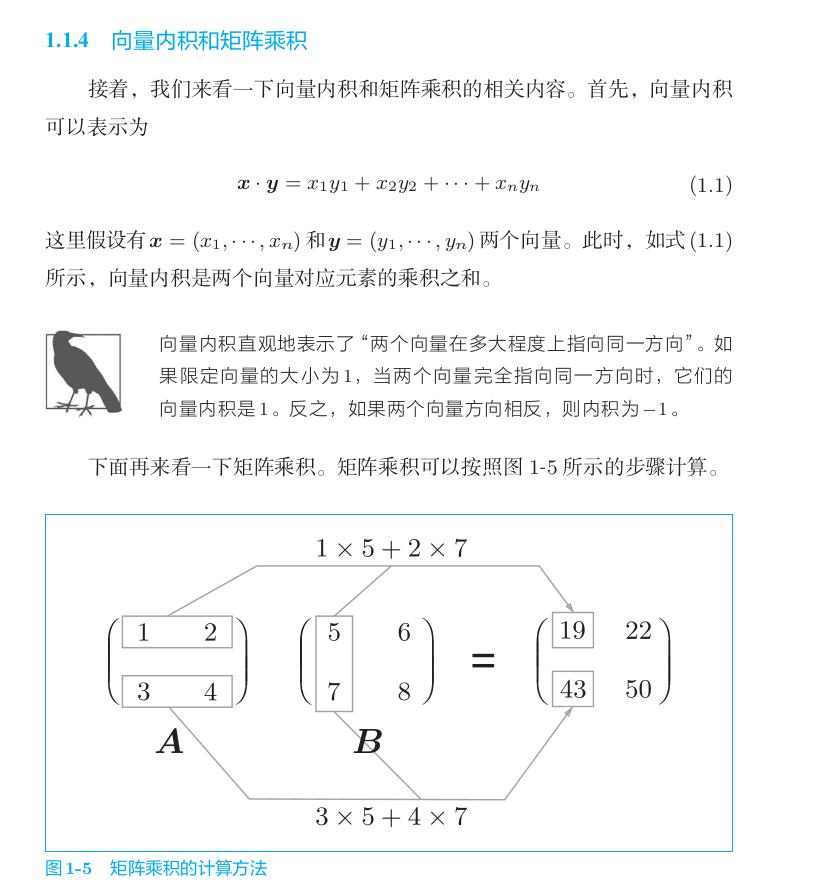

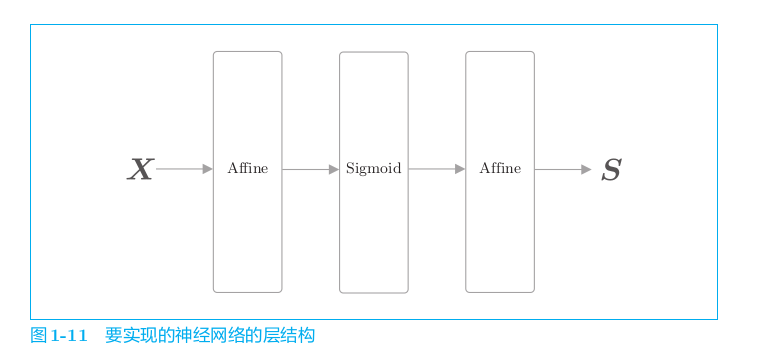

In [1]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout*(1.0 - self.out)*self.out
        return dx

    
    

In [2]:
class Affine:
    def __init__(self, W, b) -> None:
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [3]:
np.random.randn(2, 4)

array([[ 0.34765697,  2.26093186,  0.92419315,  2.1088215 ],
       [-0.1563173 , -0.27060421,  1.22573059,  0.59087186]])

In [4]:
# Python 中可以使用 + 运算符进行列表之间的拼接。下面是一个简单的例子。
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

In [5]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size) -> None:
        I, H, O = input_size, hidden_size, output_size

        # 初始化权重和偏置
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 生成层
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]

        # 将所有的权重整理到列表中
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x


In [7]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
s

array([[-2.59331952,  0.32660735,  3.28624583],
       [-2.13055478,  0.15342943,  3.22935397],
       [-1.62733727,  0.01229896,  3.00203434],
       [-2.56490003,  0.33582611,  3.29931213],
       [-1.31877734, -0.42354655,  2.24125191],
       [-2.85212975,  0.4391383 ,  3.26025237],
       [-1.54190012, -0.55007445,  2.43767052],
       [-1.92557395, -0.15617604,  3.03778178],
       [-1.86014811, -0.08838635,  3.06665696],
       [-3.02310491,  0.80608735,  3.47883288]])

In [1]:
import cupy as np
np.cuda.set_allocator(np.cuda.MemoryPool().malloc)

print('\033[92m' + '-' * 60 + '\033[0m')
print(' ' * 23 + '\033[92mGPU Mode (cupy)\033[0m')
print('\033[92m' + '-' * 60 + '\033[0m\n')

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 在监督标签为one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

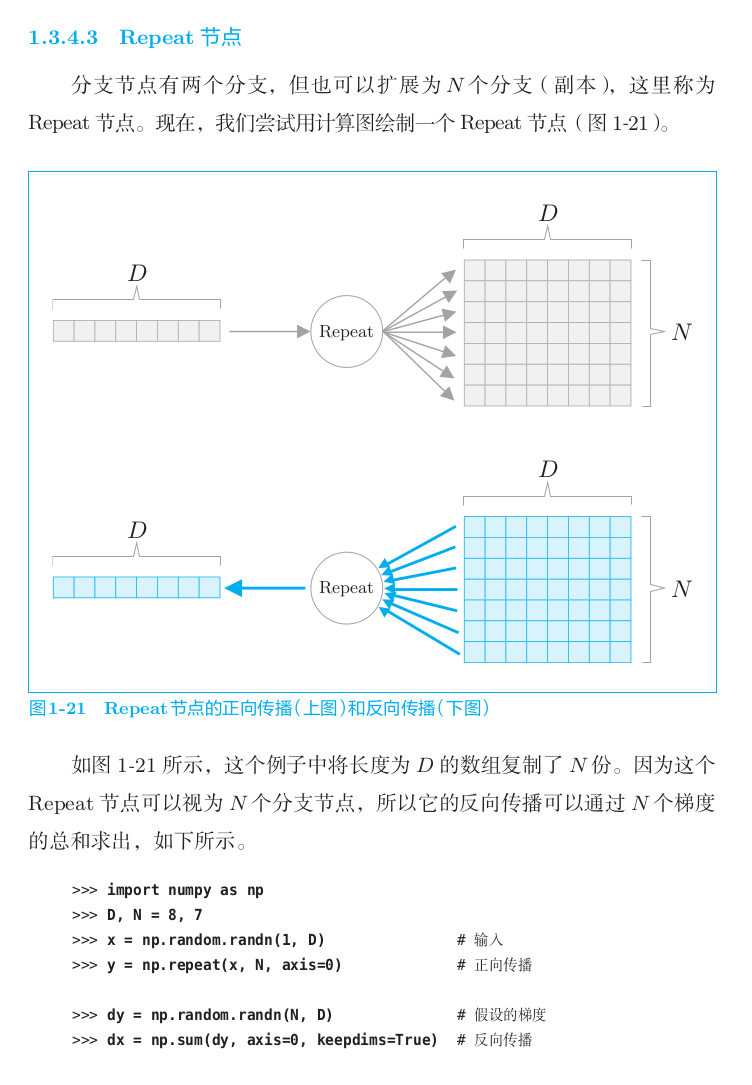

In [7]:
import numpy as npn
D, N = 2, 3
x = npn.random.randn(1, D)
y = npn.repeat(x, N, axis=0)
# x
y

array([[ 1.14245997, -0.10842097],
       [ 1.14245997, -0.10842097],
       [ 1.14245997, -0.10842097]])

In [10]:
dy = npn.random.randn(N, D)# 假设的梯度
dx = npn.sum(dy, axis=0, keepdims=True)# 反向传播
print(dx)
print(dy)

[[-4.98016089  1.99907947]]
[[-2.28494533 -0.29357509]
 [-1.14560308  1.63228783]
 [-1.54961248  0.66036674]]


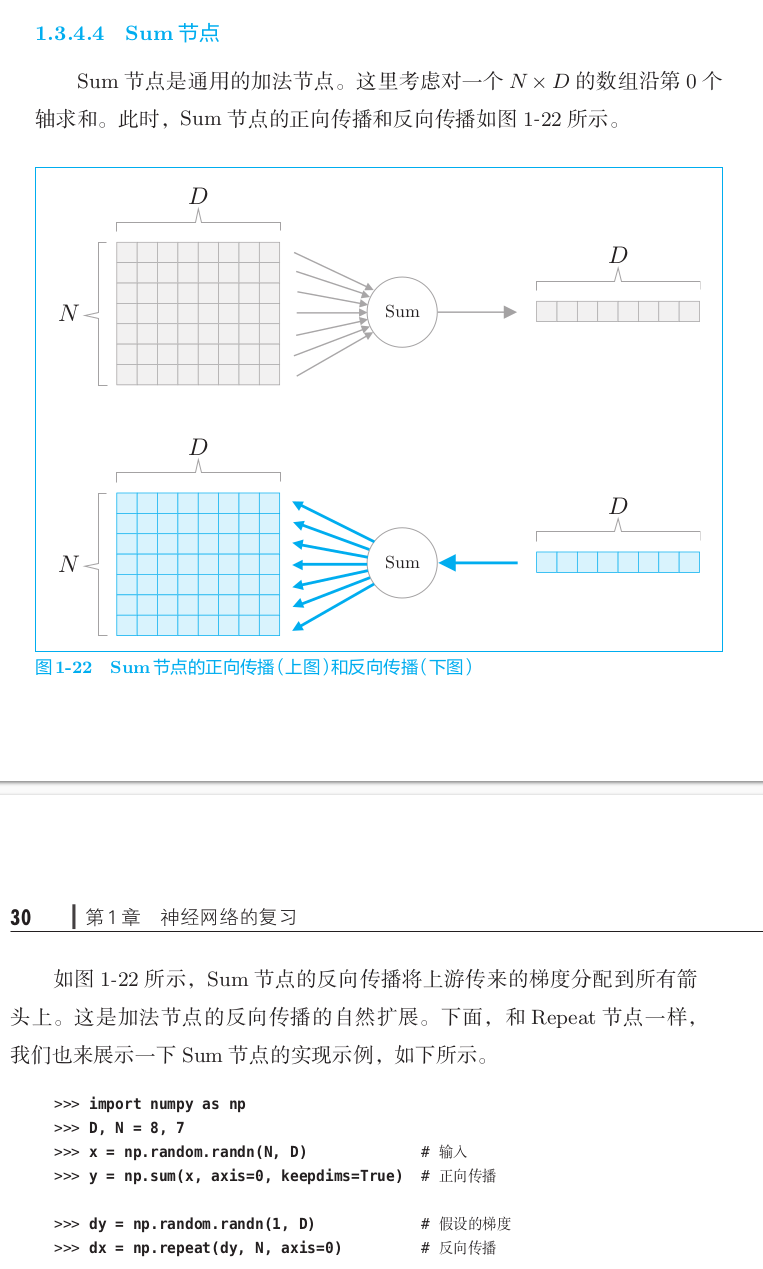

In [11]:
x = npn.random.randn(N, D)# 输入
y = npn.sum(x, axis=0, keepdims=True)
print(x, y)

[[ 0.47143671 -0.64320823]
 [-1.30230254  1.32904217]
 [-0.16297701 -1.19214044]] [[-0.99384285 -0.50630651]]


In [13]:
dy = npn.random.randn(1, D)# 假设的梯度
dx = npn.repeat(dy, N, axis=0)# 反向传播
print(dx, dy)

[[-0.2613654   0.39904809]
 [-0.2613654   0.39904809]
 [-0.2613654   0.39904809]] [[-0.2613654   0.39904809]]


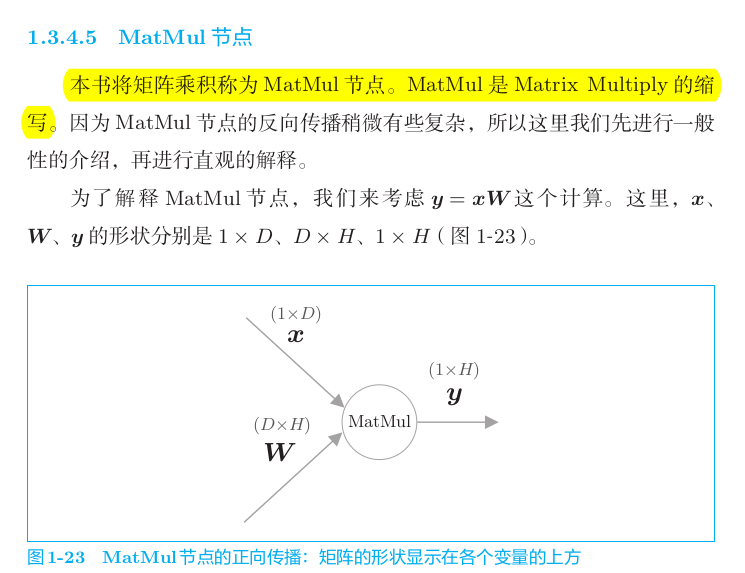

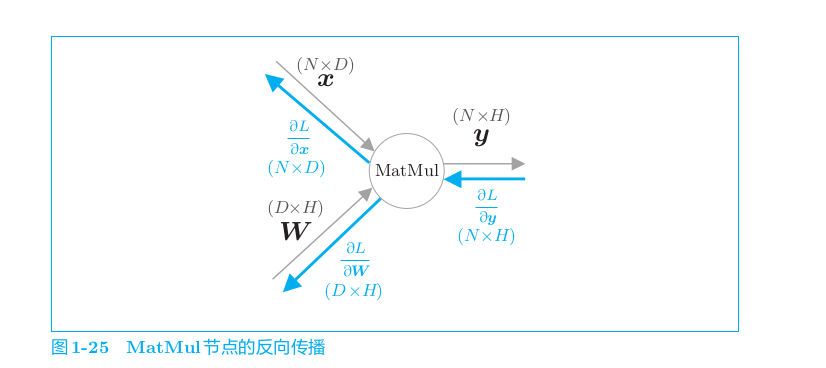

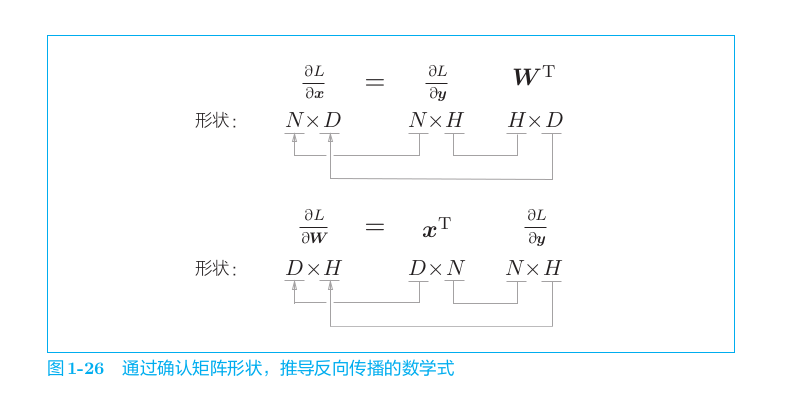

In [ ]:
class MatMul:
    def __init__(self, W) -> None:
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
    
    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW #这里也可以进行基于 grads[0] = dW 的赋值。不同的是，在使用省略号的情况下会覆盖掉 NumPy 数组。这是浅复制（shallow copy）和深复制（deep copy）的 差 异。grads[0] = dW的 赋 值 相 当 于 浅 复 制， grads[0][...] = dW 的 覆 盖 相 当 于 深复制。
        return dx

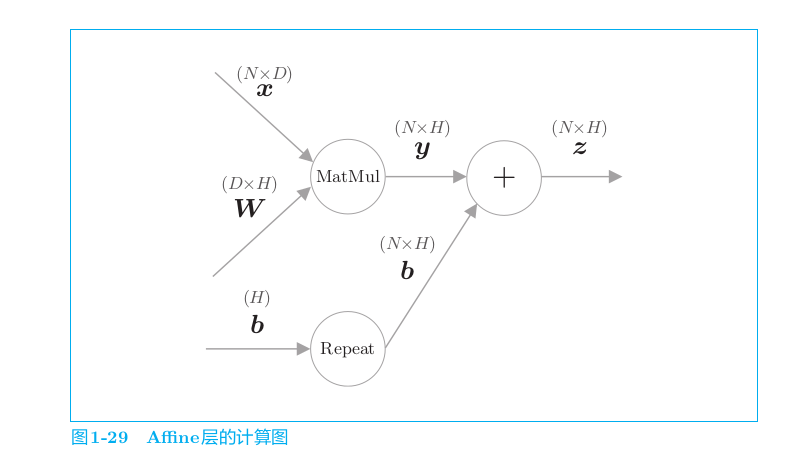

In [3]:
class Affine:
    def __init__(self, W, b) -> None:
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis = 0)

        self.grads[0][...] = dW
        self.grads[1][...] = db